# Play CNN Notebook

Just to get comfortable with CNN's in Keras

## Set Up

Tensorflow and Keras need to be set up before running this notebook. The following commands should be run from the terminal:

Install anaconda:
```conda install anaconda```

Upgrade conda packages:
```sudo conda update --all```

\*If you get a Permission Denied error, remove the problem package and re-install with
```sudo conda remove {package_name} --force```
```sudo conda install {package_name}```

Upgrade pip:
```pip install --upgrade pip```

Install tensorflow:
```sudo pip install tensorflow```

Install keras:
```sudo pip install keras```

## Load Packages

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np

%matplotlib inline

Using TensorFlow backend.


## Download MNist (handwritten digits) dataset

In [2]:
# download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Do Some EDA

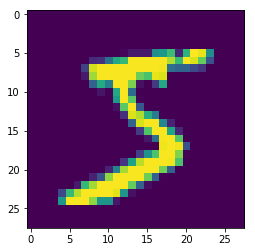

In [3]:
# plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
# check image shape
X_train[0].shape

(28, 28)

In [5]:
# take a look at image format - 28 x 28 array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Data Processing

In [6]:
# reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build Model

In [8]:
# create model
model = Sequential()

# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 85s 1ms/step - loss: 0.2474 - accuracy: 0.9498 - val_loss: 0.0914 - val_accuracy: 0.9724
Epoch 2/3
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0713 - accuracy: 0.9783 - val_loss: 0.0748 - val_accuracy: 0.9769
Epoch 3/3
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0923 - val_accuracy: 0.9769


In [11]:
# show predictions for the first 4 images in the test set
labels = model.predict(X_test[:4])
labels

array([[9.9349634e-12, 3.2819509e-16, 2.6801519e-09, 5.5554246e-08,
        3.1281814e-18, 3.2346375e-13, 1.6103537e-19, 1.0000000e+00,
        1.8666169e-09, 9.8646369e-10],
       [4.6132469e-12, 4.5846358e-11, 9.9999976e-01, 2.4496566e-12,
        2.0338553e-13, 1.5425664e-17, 2.5232472e-07, 2.0850181e-18,
        1.4293093e-10, 1.0213677e-19],
       [6.1405011e-08, 9.9996316e-01, 2.8135482e-05, 1.4992452e-08,
        3.9373194e-07, 2.1206940e-06, 3.5351493e-06, 1.2336230e-06,
        1.4105223e-06, 8.9631097e-10],
       [9.9999988e-01, 2.4250225e-16, 5.3471023e-09, 8.8090639e-15,
        7.4192605e-12, 4.9947909e-13, 9.0657686e-08, 4.2594010e-12,
        6.4512569e-11, 1.2014394e-09]], dtype=float32)

In [12]:
# round labels to make them readable
labels = np.around(labels)
labels

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
# actual labels for first 4 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)